## Question 1: Data Metric Evaluation

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# importing dataset as a pandas dataframe
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

### Exploratory Data Analysis

In [13]:
# first look at the data
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [6]:
# check for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


<b>comment:</b> observed no missing data

In [12]:
# confirming that the number of shops is 100
print(len(df['shop_id'].unique()))

100


In [17]:
# confirming that the orders were taken from a 30 day window
df.sort_values(by='created_at', key=pd.to_datetime)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
1862,1863,39,738,536,4,cash,2017-03-01 0:08:09
1741,1742,39,910,268,2,cash,2017-03-01 0:10:19
3228,3229,97,912,324,2,cash,2017-03-01 0:14:12
1267,1268,80,798,290,2,credit_card,2017-03-01 0:19:31
2689,2690,49,799,258,2,credit_card,2017-03-01 0:22:25
...,...,...,...,...,...,...,...
2630,2631,53,940,112,1,credit_card,2017-03-30 23:12:13
1685,1686,34,818,244,2,cash,2017-03-30 23:16:10
1474,1475,21,815,142,1,cash,2017-03-30 23:26:54
317,318,52,848,292,2,cash,2017-03-30 23:41:34


In [7]:
# check numerical entries
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


<b>comment:</b> The average of the order amount is $3145.13. This was taken by summing all the order amounts and dividing the sum by the number of distinct orders (number of rows in the dataset). It seems that the naive calculation of the average order value (AOV) was calculated this way.

According to a Shopify blog post on AOV ([link](https://www.shopify.ca/blog/average-order-value)), a shop's AOV is calculated by dividing its total revenue for the time period specified by the number of orders it has completed. To get an AOV of the overall shops, the individual AOV's of each shop should first be calculated. Only then can all the AOV's be averaged to output a meaningful metric for the overall AOV. In the naive calculation, the number of orders per shop is not taken into account. If there are a few shops that make up a large share of orders, this naive calculation method would yield a abnormally high AOV that is not representative of the actual average AOV.

In [33]:
# calculating AOV per shop
df_AOV_per_shop = df.groupby(['shop_id']).sum()['order_amount']/df.groupby(['shop_id'])['order_amount'].count()
df_AOV_per_shop.describe()

count       100.000000
mean       3136.834088
std       23935.881130
min         162.857143
25%         263.675962
50%         308.889758
75%         336.628352
max      235101.490196
Name: order_amount, dtype: float64

Text(0.5, 0, 'AOV')

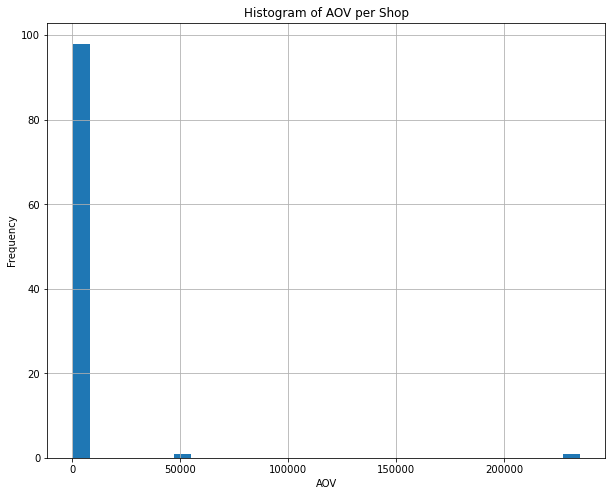

In [54]:
# visualizing the range of AOV per shop
plt.figure(figsize=(10,8))
df_AOV_per_shop.hist(bins=30)
plt.title('Histogram of AOV per Shop')
plt.ylabel('Frequency')
plt.xlabel('AOV')

<b>comment:</b> From the above tabular and visual results, we can see that newly calculated AOV is $3136.83. This is barely lower than the naive caluculation. The reason for this high average value is due to the few shops that have abnormally high average order values. These shops might be whole sale shops that sell in bulk and thus is not representative of the actual average order value for a typical shop.

Because taking the average of the AOV per shop is susceptible to influence from outliers, a better representation of the overall AOV can be obtained by taking the median value of the AOV per shop.

In [58]:
# calculating the median of the AOV per shop
df_AOV_per_shop.median()

308.8897584973166

<b>comment:</b> By calculating th median AOV per shop, we get a more realistic value of $308.89 per order.

### Conclusion

By exploring the data, it is apparent that the naive calculation method did not calculate the AOV as per Shopify's standards. Instead of taking the total order amount and dividing it by the total number of orders, the AOV per shop should first be calculated and then averaged. Despite performing this rectified method, the AOV calculated of $3135.83 does not seem too high. Upon further investigation, it is seen that a few outliers with extremely high order amounts are skewing the average. To obtain a more representative metric, it is recommended to take the median value of the AOV per shop instead.

A python function that takes in the dataset and performs this evaluation can be found below:

In [66]:
def median_AOV(df):
    '''
    This function takes in a Shopify dataset and calculates the median AOV per shop.
    inputs - pandas dataframe
    outputs - median AOV
    '''
    df_AOV_per_shop = df.groupby(['shop_id']).sum()['order_amount']/df.groupby(['shop_id'])['order_amount'].count()
    median_AOV_per_shop = df_AOV_per_shop.median()
    
    print('The median AOV per shop is: $%.2f' % round(median_AOV_per_shop,2))

median_AOV(df)

The median AOV per shop is: $308.89


## Question 2

### a. How many orders were shipped by Speedy Express in total?

SQL query:

```
SELECT COUNT(ShipperID)
FROM Orders
WHERE ShipperID == 1;
```

Output:

| count(ShipperID) |
| --- |
| 54 |

Answer: There are a <b>54</b> orders shipped by Speed Express in total.


### b. What is the last name of the employee with the most orders?

SQL query:

```
SELECT Employees.LastName, COUNT(Orders.EmployeeID) AS 'Frequency'
FROM Orders, Employees
WHERE Orders.EmployeeID == Employees.EmployeeID
GROUP BY Orders.EmployeeID
ORDER BY Frequency DESC
Limit 1;
```

Output:

| LastName | Frequency |
| --- | --- |
| Peacock | 40 |

Answer: The last name of the employee with the most orders is <b>Peacock</b>.

### c. What product was ordered the most by customers in Germany?

SQL query:

```
SELECT Products.ProductName, SUM(Quantity) AS TotalQuantity
FROM Orders, OrderDetails, Customers, Products
WHERE Customers.Country == "Germany" AND OrderDetails.OrderID == Orders.OrderID AND OrderDetails.ProductID == Products.ProductID AND Customers.CustomerID == Orders.CustomerID
GROUP BY Products.ProductID
ORDER BY TotalQuantity DESC
LIMIT 1;
```

Output:

| ProductName| TotalQuantity |
| --- | --- |
| Boston Crab Meat | 160 |

Answer: The product that was ordered the most by customers in Germany was <b>Boston Crab Meat</b>.